# Modeling HIV over Time
Alex Hindelang

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def make_system(gamma, mu, tau, beta, rho, alpha, sigma, delta, pi):
    
    init = State(R = 200, L=0, E=0, V=100)

    t0 = 0
    t_end = 120
    dt = 0.1

    return System(init=init, t0=t0, t_end=t_end, dt=dt, gamma=gamma, mu=mu, tau=tau, beta=beta, rho=rho, alpha=alpha, sigma=sigma, delta=delta, pi=pi)

In [3]:
rates = make_system(1.36, 0.00136, 0.2, 0.00027, 0.1, 0.036, 2, 0.33, 100)

,values
init,R 200 L 0 E 0 V 100 dtype: int64
t0,0
t_end,120
dt,0.1
gamma,1.36
mu,0.00136
tau,0.2
beta,0.00027
rho,0.1
alpha,0.036


In [4]:
def plot_results_cells(R,L,E):
    
    plot(R, '--', label='Uninfected CD4')
    plot(L, '-', label='Latent Cells')
    plot(E, '.',label='Activated Cells')
    decorate(xlabel='Time (days)',
             ylabel='Number of Cells')

In [5]:
def plot_results_virons(V):
    
    plot(V, '.',label='Free Virons')
    decorate(xlabel='Time (days)',
             ylabel='Number of Virons')

In [6]:
def update_func(state, dt, system):
    r, l, e, v = state
    unpack(system)
    dr = ((gamma * tau) - (mu * r) - (beta * r * v)) * dt
    dl = ((rho * beta * r * v) - (mu * l) - (alpha * l)) * dt
    de = (((1 - rho) *beta * r *v) + (alpha * l) - (delta * e)) * dt
    dv = ((pi * e) - (sigma * v)) * dt
    
    r += dr
    l += dl
    e += de
    v += dv
    
    return State(R=r, L=l, E=e, V=v)

In [7]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system)
    
    return frame

In [8]:
results = run_simulation(rates, update_func)
results.head()

,R,L,E,V
0.0,200,0,0,100
0.1,199.46,0.054,0.486,80
0.2,199.029,0.0968816,0.857907,68.86
0.3,198.659,0.133524,1.16298,63.6671
0.4,198.318,0.167174,1.43243,62.5635


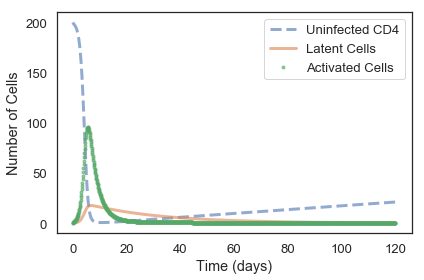

In [9]:
plot_results_cells(results.R, results.L, results.E)

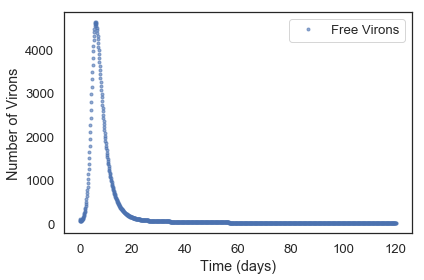

In [10]:
plot_results_virons(results.V)